# Download Data:
You can download the dataset using the commands below  and see it’s description at https://www.openml.org/d/31

### Attribute description from https://www.openml.org/d/31

1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install feature_engine scikit-learn -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
import feature_engine
import sklearn
import sys

In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from feature_engine.encoding import RareLabelEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.transformation import LogTransformer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from numpy.core.function_base import logspace
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
base = Path("/content/drive/MyDrive/Applied_ML/Class_4/Assignment")

In [ ]:
custom_function_folder = base/"Custom_function"

In [ ]:
sys.path.append(str(custom_function_folder))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Applied_ML/Class_4/Assignment/Custom_function']

In [ ]:
from eda_plots import diagnostic_plots, plot_target_by_category

In [ ]:
from  plot_learning_curve import plot_learning_curve


In [ ]:
X,y = fetch_openml("credit-g", version=1, as_frame=True, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [ ]:
y.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): ['bad', 'good']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [ ]:
categorical_1 = [var for var in X.columns if X[var].dtype == "category"]
discrete_1 = [var for var in X.columns if X[var].dtype != "category" and (len(X[var].unique())< 20)]
continous_1 = [ var for var in X.columns if X[var].dtype != 'category'
              and var not in discrete_1]

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=0)

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin

class ConvertToNumpyArray(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y=None):
        return self
    def transform(self, X):
        return np.array(X)

In [ ]:
rare_labels_1 = ["foreign_worker","purpose"]
columns_to_transform_1 = ["age","credit_amount","duration"]

In [ ]:
EDA_credit_svc_1 = Pipeline([
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels_1,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical_1,ignore_format = True)),
    ('log_transformer',LogTransformer(variables=columns_to_transform_1)),
    ('scaler',MaxAbsScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('svc',LinearSVC(penalty ='l2',random_state=0, max_iter =100000, dual = False
                       ))
])

In [ ]:
param_grid_linear_1 = {"svc__C":(np.linspace(0.001,1000,5))}

In [ ]:
grid_svm_linear = RandomizedSearchCV(EDA_credit_svc_1,param_grid_linear_1,cv=5, return_train_score=True)

In [ ]:
grid_svm_linear.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rare_label_encoder',
                                              RareLabelEncoder(ignore_format=True,
                                                               n_categories=1,
                                                               variables=['foreign_worker',
                                                                          'purpose'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(ignore_format=True,
                                                            variables=['checking_status',
                                                                       'credit_history',
                                                                       'purpose',
                                                                       'savings_status',
                                                                       'employment',
                                                                       'personal_status',
                                                                       'other_parties',
                                                                       'property_magn...
                                                                       'foreign_worker'])),
                                             ('log_transformer',
                                              LogTransformer(variables=['age',
                                                                        'credit_amount',
                                                                        'duration'])),
                                             ('scaler', MaxAbsScaler()),
                                             ('array_conversion',
                                              ConvertToNumpyArray()),
                                             ('svc',
                                              LinearSVC(dual=False,
                                                        max_iter=100000,
                                                        random_state=0))]),
                   param_distributions={'svc__C': array([1.0000000e-03, 2.5000075e+02, 5.0000050e+02, 7.5000025e+02,
       1.0000000e+03])},
                   return_train_score=True)

In [ ]:
print(f"best parameter: {grid_svm_linear.best_params_}")
print(f"best validation score: {grid_svm_linear.best_score_}")

best parameter: {'svc__C': 250.00075}
best validation score: 0.7522388059701492


In [ ]:
print(f"test_score: {grid_svm_linear.score(X_test,y_test)}")

test_score: 0.7545454545454545


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

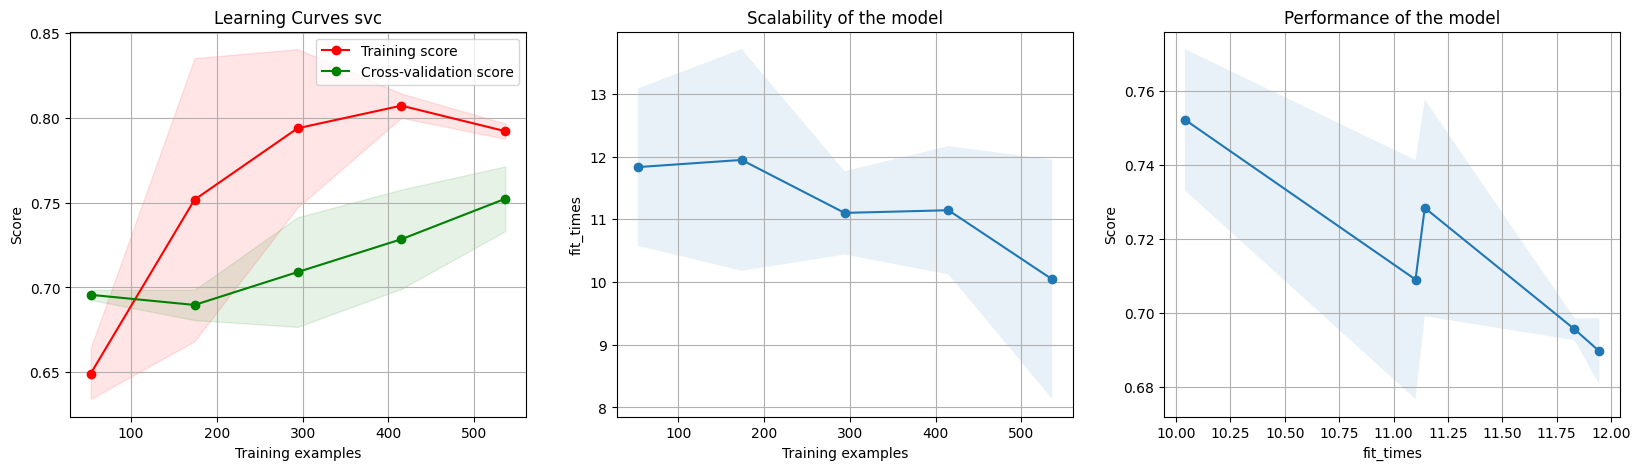

In [ ]:
plot_learning_curve(grid_svm_linear, 'Learning Curves svc', X_train, y_train, n_jobs=-1)

##Lets narrow the search by C parameter between 200 to 300

In [ ]:
param_grid_linear_2 = {"svc__C":(np.linspace(200,400,20))}

In [ ]:
grid_svm_linear_2 = RandomizedSearchCV(EDA_credit_svc_1,param_grid_linear_2,cv=5, return_train_score=True)

In [ ]:
grid_svm_linear_2.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rare_label_encoder',
                                              RareLabelEncoder(ignore_format=True,
                                                               n_categories=1,
                                                               variables=['foreign_worker',
                                                                          'purpose'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(ignore_format=True,
                                                            variables=['checking_status',
                                                                       'credit_history',
                                                                       'purpose',
                                                                       'savings_status',
                                                                       'employment',
                                                                       'personal_status',
                                                                       'other_parties',
                                                                       'property_magn...
                                              LinearSVC(dual=False,
                                                        max_iter=100000,
                                                        random_state=0))]),
                   param_distributions={'svc__C': array([200.        , 210.52631579, 221.05263158, 231.57894737,
       242.10526316, 252.63157895, 263.15789474, 273.68421053,
       284.21052632, 294.73684211, 305.26315789, 315.78947368,
       326.31578947, 336.84210526, 347.36842105, 357.89473684,
       368.42105263, 378.94736842, 389.47368421, 400.        ])},
                   return_train_score=True)

In [ ]:
print(f"best parameter: {grid_svm_linear_2.best_params_}")
print(f"best validation score: {grid_svm_linear_2.best_score_}")

best parameter: {'svc__C': 378.94736842105266}
best validation score: 0.7522388059701492


##Lets narrow down the search of C to 400 to 2000

In [ ]:
param_grid_linear_3 = {"svc__C":range(400,2000,10)}

In [ ]:
grid_svm_linear_3 = RandomizedSearchCV(EDA_credit_svc_1,param_grid_linear_3,cv=5, return_train_score=True)

In [ ]:
grid_svm_linear_3.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rare_label_encoder',
                                              RareLabelEncoder(ignore_format=True,
                                                               n_categories=1,
                                                               variables=['foreign_worker',
                                                                          'purpose'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(ignore_format=True,
                                                            variables=['checking_status',
                                                                       'credit_history',
                                                                       'purpose',
                                                                       'savings_status',
                                                                       'employment',
                                                                       'personal_status',
                                                                       'other_parties',
                                                                       'property_magn...
                                                                       'other_payment_plans',
                                                                       'housing',
                                                                       'job',
                                                                       'own_telephone',
                                                                       'foreign_worker'])),
                                             ('log_transformer',
                                              LogTransformer(variables=['age',
                                                                        'credit_amount',
                                                                        'duration'])),
                                             ('scaler', MaxAbsScaler()),
                                             ('array_conversion',
                                              ConvertToNumpyArray()),
                                             ('svc',
                                              LinearSVC(dual=False,
                                                        max_iter=100000,
                                                        random_state=0))]),
                   param_distributions={'svc__C': range(400, 2000, 10)},
                   return_train_score=True)

In [ ]:
print(f"best parameter: {grid_svm_linear_3.best_params_}")
print(f"best validation score: {grid_svm_linear_3.best_score_}")

best parameter: {'svc__C': 1500}
best validation score: 0.7522388059701492


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

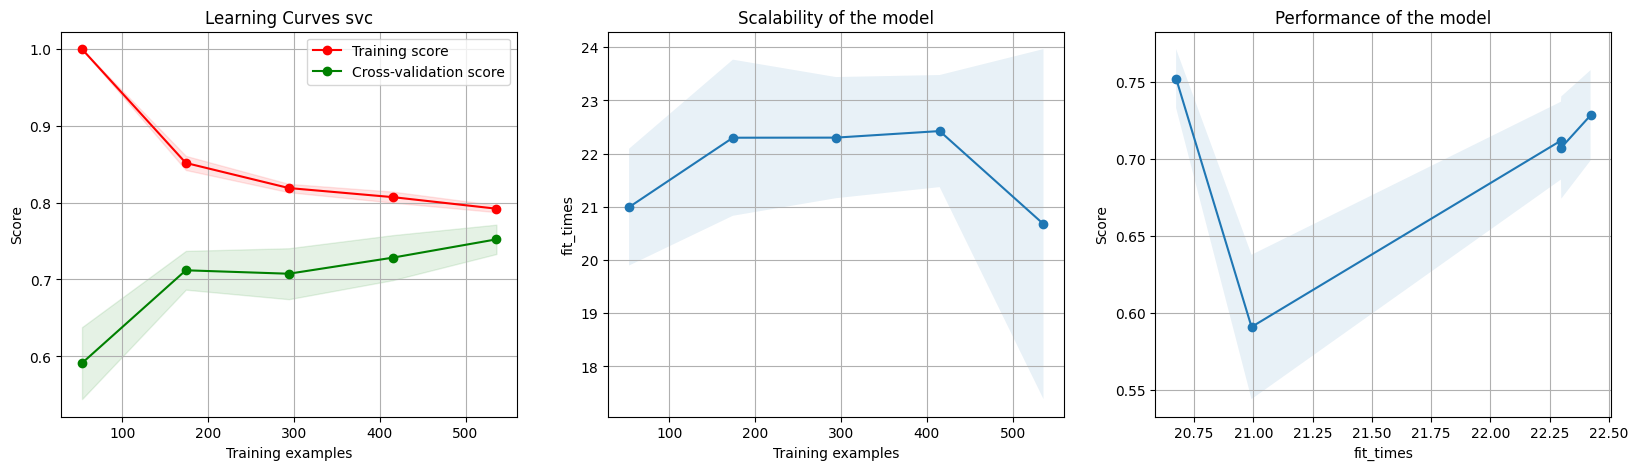

In [ ]:
plot_learning_curve(grid_svm_linear_3, 'Learning Curves svc', X_train, y_train, n_jobs=-1)

In [ ]:
print(f"Test score is {grid_svm_linear_3.score(X_test,y_test)}")

Test score is 0.7545454545454545


# Now let us Try Kernel's Trick with "rbf", "poly" , "sigmoid"

In [ ]:
EDA_credit_svc_2 = Pipeline([
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels_1,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical_1,ignore_format = True)),
    ('log_transformer',LogTransformer(variables=columns_to_transform_1)),
    ('scaler',MaxAbsScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('svc',SVC(random_state=0))
])

In [ ]:
param_grid_kernel_1 = {"svc__kernel":['rbf','sigmoid','poly'],
                       "svc__C":loguniform(1,10000),
                       "svc__gamma":loguniform(0.001,1000),
                       "svc__degree":[2,3,4,5]}

In [ ]:
grid_svm_kernel = RandomizedSearchCV(EDA_credit_svc_2,param_grid_kernel_1,cv=5, return_train_score=True)

In [ ]:
grid_svm_kernel.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rare_label_encoder',
                                              RareLabelEncoder(ignore_format=True,
                                                               n_categories=1,
                                                               variables=['foreign_worker',
                                                                          'purpose'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(ignore_format=True,
                                                            variables=['checking_status',
                                                                       'credit_history',
                                                                       'purpose',
                                                                       'savings_status',
                                                                       'employment',
                                                                       'personal_status',
                                                                       'other_parties',
                                                                       'property_magn...
                                             ('array_conversion',
                                              ConvertToNumpyArray()),
                                             ('svc', SVC(random_state=0))]),
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78ec0b763af0>,
                                        'svc__degree': [2, 3, 4, 5],
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78ec0b7925f0>,
                                        'svc__kernel': ['rbf', 'sigmoid',
                                                        'poly']},
                   return_train_score=True)

In [ ]:
print(f"best parameter: {grid_svm_kernel.best_params_}")
print(f"best validation score: {grid_svm_kernel.best_score_}")

best parameter: {'svc__C': 19.52793716713594, 'svc__degree': 5, 'svc__gamma': 0.0015902219680002784, 'svc__kernel': 'rbf'}
best validation score: 0.746268656716418


In [ ]:
results_kernel_1 = pd.DataFrame(grid_svm_kernel.cv_results_)

In [ ]:
results_kernel_1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__degree,param_svc__gamma,param_svc__kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.112364,0.007341,0.074729,0.002730,7.163216,4,0.131005,sigmoid,"{'svc__C': 7.163216071556397, 'svc__degree': 4...",0.716418,...,0.668657,0.027763,10,0.613806,0.638060,0.604478,0.617537,0.608209,0.616418,0.011717
1,0.129688,0.020764,0.104632,0.025288,19.527937,5,0.00159,rbf,"{'svc__C': 19.52793716713594, 'svc__degree': 5...",0.738806,...,0.746269,0.012487,1,0.766791,0.779851,0.766791,0.779851,0.783582,0.775373,0.007138
2,0.173874,0.005451,0.123272,0.003798,2672.505123,3,4.052923,rbf,"{'svc__C': 2672.505122894324, 'svc__degree': 3...",0.701493,...,0.694030,0.004720,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.135510,0.021994,0.096442,0.021027,8488.441493,5,80.037648,sigmoid,"{'svc__C': 8488.441492699516, 'svc__degree': 5...",0.701493,...,0.695522,0.002985,4,0.694030,0.695896,0.695896,0.695896,0.695896,0.695522,0.000746
4,0.107063,0.008252,0.077654,0.006775,3.945347,4,0.066555,poly,"{'svc__C': 3.9453471738450263, 'svc__degree': ...",0.746269,...,0.725373,0.024251,2,0.983209,0.983209,0.977612,0.983209,0.988806,0.983209,0.003540


In [ ]:
results_kernel_1.sort_values(by="mean_test_score",ascending=False,inplace=True)
results_kernel_1[[
    'param_svc__C', 'param_svc__kernel', 'param_svc__gamma','param_svc__degree',
    'mean_test_score', 'std_test_score', 'mean_train_score'
]].head(10)


,param_svc__C,param_svc__kernel,param_svc__gamma,param_svc__degree,mean_test_score,std_test_score,mean_train_score
1,19.527937,rbf,0.00159,5,0.746269,0.012487,0.775373
4,3.945347,poly,0.066555,4,0.725373,0.024251,0.983209
7,219.993999,sigmoid,0.015326,2,0.723881,0.009440,0.716791
3,8488.441493,sigmoid,80.037648,5,0.695522,0.002985,0.695522
5,1.128695,poly,0.023633,5,0.695522,0.002985,0.695522
6,324.580269,sigmoid,588.521498,2,0.695522,0.002985,0.695522
8,3541.34636,rbf,0.84626,2,0.695522,0.005585,1.000000
9,144.1473,sigmoid,4.096385,5,0.695522,0.002985,0.695522
2,2672.505123,rbf,4.052923,3,0.694030,0.004720,1.000000
0,7.163216,sigmoid,0.131005,4,0.668657,0.027763,0.616418


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

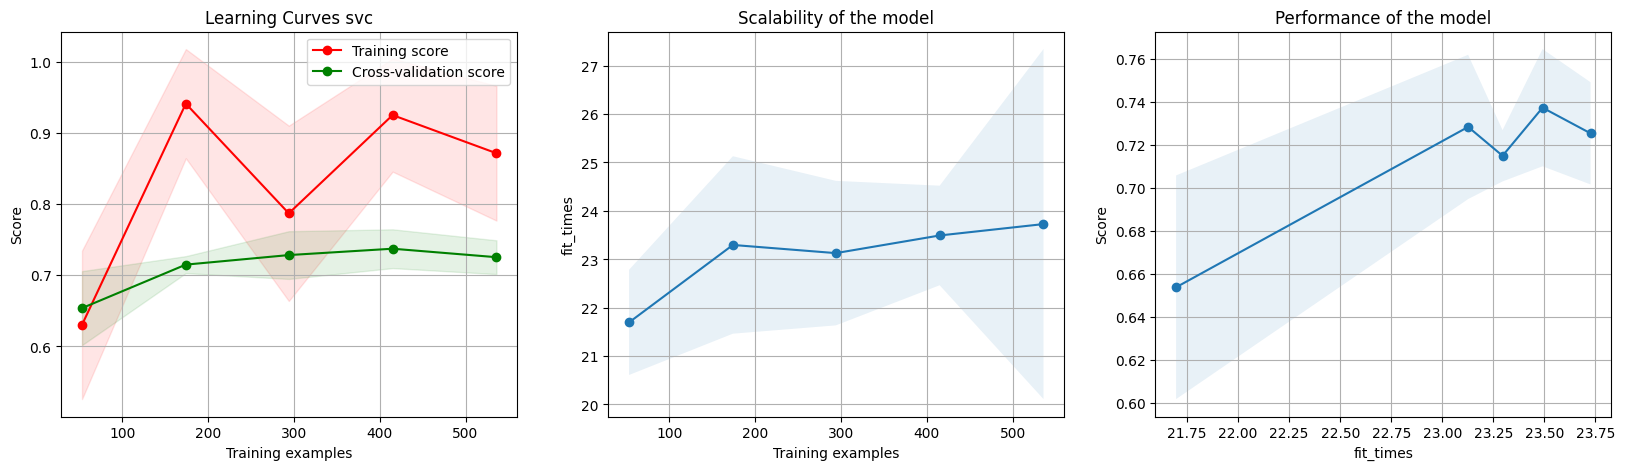

In [ ]:
plot_learning_curve(grid_svm_kernel, 'Learning Curves svc', X_train, y_train, n_jobs=-1)

##As i see better result on rbf, let me try with diff parameters

In [ ]:
param_grid_kernel_2 = {"svc__kernel":['rbf'],
                       "svc__C":range(2000,4000,20),
                       "svc__gamma":np.linspace(0.01,1.0,20)}

In [ ]:
grid_svm_kernel_2 = RandomizedSearchCV(EDA_credit_svc_2,param_grid_kernel_2,cv=5, return_train_score=True)

In [ ]:
grid_svm_kernel_2.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('rare_label_encoder',
                                              RareLabelEncoder(ignore_format=True,
                                                               n_categories=1,
                                                               variables=['foreign_worker',
                                                                          'purpose'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(ignore_format=True,
                                                            variables=['checking_status',
                                                                       'credit_history',
                                                                       'purpose',
                                                                       'savings_status',
                                                                       'employment',
                                                                       'personal_status',
                                                                       'other_parties',
                                                                       'property_magn...
                                             ('svc', SVC(random_state=0))]),
                   param_distributions={'svc__C': range(2000, 4000, 20),
                                        'svc__gamma': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
                                        'svc__kernel': ['rbf']},
                   return_train_score=True)

In [ ]:
print(f"best parameters: {grid_svm_kernel_2.best_params_}")
print(f"best score: {grid_svm_kernel_2.best_score_} ")

best parameters: {'svc__kernel': 'rbf', 'svc__gamma': 0.37473684210526315, 'svc__C': 3080}
best score: 0.726865671641791 


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

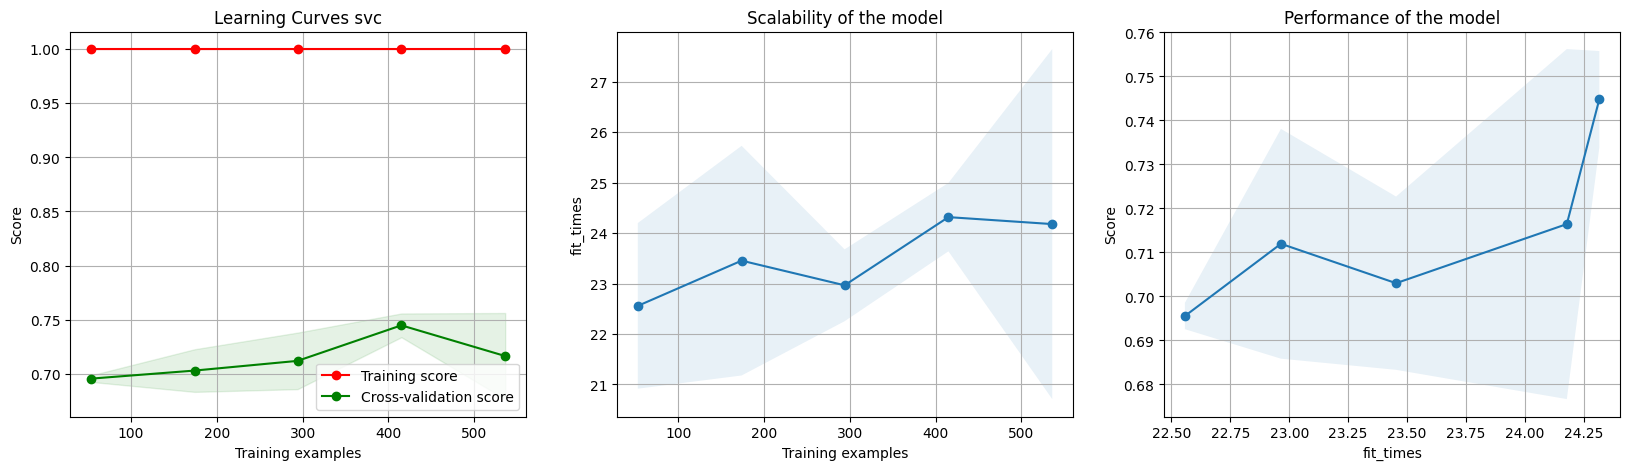

In [ ]:
plot_learning_curve(grid_svm_kernel_2, 'Learning Curves svc', X_train, y_train, n_jobs=-1)

## I see that Linear SVM and SVM with kernel = "rbf" are giving me best fitting my data and then generalizing.

## As Linear SVC is a simpler model, I would prefer **grid_svm_linear_3**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Applied_ML/Class_4/Assignment/Datasets/SeoulBikeData.csv', encoding='latin-1')

In [ ]:
data_1 = data.drop(['Date'],axis=1)

In [ ]:
categorical = [var for var in data_1.columns if data_1[var].dtype == 'O'and var not in ['Rented Bike Count']]
discrete = [var for var in data_1.columns if data_1[var].dtype != 'O'and len(data_1[var].unique()) < 20 and var not in ['Rented Bike Count']]
continuous = [var for var in data_1.columns if data_1[var].dtype != 'O' and var not in discrete and var not in ['Rented Bike Count']]

In [ ]:
categorical

['Seasons', 'Holiday', 'Functioning Day']

In [ ]:
A = data_1.drop(['Rented Bike Count'], axis=1)
b = data_1['Rented Bike Count']
A_train,A_test, b_train, b_test = train_test_split(A,b,random_state=0,test_size=0.33)

In [ ]:
categorical

['Seasons', 'Holiday', 'Functioning Day']

In [ ]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Seasons                    8760 non-null   object 
 10  Holiday                    8760 non-null   object 
 11  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 821.4+ KB


In [ ]:
columns_to_drop = ['Dew point temperature(°C)']

In [ ]:
columns_to_transform = ['Wind speed (m/s)','Rainfall(mm)','Snowfall (cm)','Hour','Solar Radiation (MJ/m2)']

In [ ]:
columns_to_scale = ['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
rare_labels =['Functioning Day']

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.selection.drop_correlated_features import Variables
from sklearn.preprocessing import MinMaxScaler
from feature_engine.selection import DropFeatures



EDA_bike = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('scaler',MinMaxScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('svm',LinearSVC(penalty ='l2',random_state=0, max_iter =100000, dual = False))
    ])

In [ ]:
param_grid_bike_linear_1 = {"svm__C":range(1,1000,10)}

In [ ]:
grid_bike_linear_1 = RandomizedSearchCV(EDA_bike,param_grid_bike_linear_1,cv=5, return_train_score=True)

In [ ]:
grid_bike_linear_1.fit(A_train,b_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('drop_features',
                                              DropFeatures(features_to_drop=['Dew '
                                                                             'point '
                                                                             'temperature(°C)'])),
                                             ('rare_label_encoder',
                                              RareLabelEncoder(ignore_format=True,
                                                               n_categories=1,
                                                               variables=['Functioning '
                                                                          'Day'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(ignore_format=True,
                                                            variables=['Seasons',
                                                                       'Holiday',
                                                                       'Functioning '
                                                                       'Day'])),
                                             ('yj_transformer',
                                              YeoJohnsonTransformer(variables=['Wind '
                                                                               'speed '
                                                                               '(m/s)',
                                                                               'Rainfall(mm)',
                                                                               'Snowfall '
                                                                               '(cm)',
                                                                               'Hour',
                                                                               'Solar '
                                                                               'Radiation '
                                                                               '(MJ/m2)'])),
                                             ('scaler', MinMaxScaler()),
                                             ('array_conversion',
                                              ConvertToNumpyArray()),
                                             ('svm',
                                              LinearSVC(dual=False,
                                                        max_iter=100000,
                                                        random_state=0))]),
                   param_distributions={'svm__C': range(1, 1000, 10)},
                   return_train_score=True)

In [ ]:
print(f"best parameter : {grid_bike_linear_1.best_params_}")
print(f"best Score : {grid_bike_linear_1.best_score_}")

best parameter : {'svm__C': 21}
best Score : 0.035611015015590705


In [ ]:
EDA_bike_2 = Pipeline([
    ('drop_features',DropFeatures(columns_to_drop)),
    ('rare_label_encoder',RareLabelEncoder(n_categories=1,variables=rare_labels,ignore_format=True)),
    ('one_hot_encoder',OneHotEncoder(variables=categorical,ignore_format = True)),
    ('yj_transformer',YeoJohnsonTransformer(variables=columns_to_transform)),
    ('scaler',MinMaxScaler()),
    ('array_conversion',ConvertToNumpyArray()),
    ('svm',SVC())
    ])

In [ ]:
param_grid_bike_kernel_1 = {"svm__kernel": ['rbf',"sigmoid"],
                            "svm__C":range(1,1000,100),
                            "svm__gamma":range(1,10,10)
                            }

In [ ]:
grid_bike_kernerl_1 = RandomizedSearchCV(EDA_bike_2, param_grid_bike_kernel_1,cv=5,return_train_score = True)

In [ ]:
grid_bike_kernerl_1.fit(A_train,b_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('drop_features',
                                              DropFeatures(features_to_drop=['Dew '
                                                                             'point '
                                                                             'temperature(°C)'])),
                                             ('rare_label_encoder',
                                              RareLabelEncoder(ignore_format=True,
                                                               n_categories=1,
                                                               variables=['Functioning '
                                                                          'Day'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(ignore_format=True,
                                                            variables=['Seasons',
                                                                       'Holiday',
                                                                       'Functioning '
                                                                       'Day'])),
                                             ('yj_transformer',
                                              YeoJohnsonTransformer(variables=['Wind '
                                                                               'speed '
                                                                               '(m/s)',
                                                                               'Rainfall(mm)',
                                                                               'Snowfall '
                                                                               '(cm)',
                                                                               'Hour',
                                                                               'Solar '
                                                                               'Radiation '
                                                                               '(MJ/m2)'])),
                                             ('scaler', MinMaxScaler()),
                                             ('array_conversion',
                                              ConvertToNumpyArray()),
                                             ('svm', SVC())]),
                   param_distributions={'svm__C': range(1, 1000, 100),
                                        'svm__gamma': range(1, 10, 10),
                                        'svm__kernel': ['rbf', 'sigmoid']},
                   return_train_score=True)

In [ ]:
print(f"best parameter : {grid_bike_kernerl_1.best_params_}")
print(f"best score: {grid_bike_kernerl_1.best_score_}")

best parameter : {'svm__kernel': 'sigmoid', 'svm__gamma': 1, 'svm__C': 201}
best score: 0.035269863815461745


In [ ]:
param_grid_bike_kernel_2 = {"svm__kernel": ['poly'],
                            "svm__C":loguniform(0.01, 1000),
                            "svm__gamma":loguniform(0.0001, 10),
                            "svm__degree":[2,3],
                            }

In [ ]:
grid_bike_kernerl_2 = RandomizedSearchCV(EDA_bike_2, param_grid_bike_kernel_2,cv=5,return_train_score = True)

In [ ]:
grid_bike_kernerl_2.fit(A_train,b_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('drop_features',
                                              DropFeatures(features_to_drop=['Dew '
                                                                             'point '
                                                                             'temperature(°C)'])),
                                             ('rare_label_encoder',
                                              RareLabelEncoder(ignore_format=True,
                                                               n_categories=1,
                                                               variables=['Functioning '
                                                                          'Day'])),
                                             ('one_hot_encoder',
                                              OneHotEncoder(ignore_format=True,
                                                            variables=['Seasons',
                                                                       'Holiday',
                                                                       'Functioning '
                                                                       'Day'])),
                                             ('yj_tra...
                                             ('scaler', MinMaxScaler()),
                                             ('array_conversion',
                                              ConvertToNumpyArray()),
                                             ('svm', SVC())]),
                   param_distributions={'svm__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e4f3505bca0>,
                                        'svm__degree': [2, 3],
                                        'svm__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e4f34ed3f10>,
                                        'svm__kernel': ['poly']},
                   return_train_score=True)


-  Compare KNN and Linear Regression.(previous HWs)  Basd on your anaysis which algorithm you will recommend.
- The aim of the piepline is to predict the rented bike count.


In [ ]:
print(f"best parameter : {grid_bike_kernerl_2.best_params_}")
print(f"best score: {grid_bike_kernerl_2.best_score_}")

best parameter : {'svm__C': 621.3174804535482, 'svm__degree': 2, 'svm__gamma': 0.025376933991757274, 'svm__kernel': 'poly'}
best score: 0.03561072455054164


In [ ]:
results_kernel_bike_1 = pd.DataFrame(grid_bike_kernerl_1.cv_results_)

In [ ]:
results_kernel_bike_2 = pd.DataFrame(grid_bike_kernerl_2.cv_results_)

In [ ]:
results_kernel_bike_1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__kernel,param_svm__gamma,param_svm__C,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,6.325403,0.537359,20.961038,0.450974,sigmoid,1,201,"{'svm__kernel': 'sigmoid', 'svm__gamma': 1, 's...",0.035775,0.036627,...,0.035270,0.001015,1,0.037487,0.034931,0.035996,0.035783,0.034923,0.035824,0.000939
2,8.231262,0.414934,22.715788,0.420049,rbf,1,101,"{'svm__kernel': 'rbf', 'svm__gamma': 1, 'svm__...",0.035775,0.034923,...,0.035100,0.001003,2,0.858360,0.867519,0.871140,0.871565,0.865630,0.866843,0.004789
0,7.149190,0.358880,22.698250,1.187799,sigmoid,1,501,"{'svm__kernel': 'sigmoid', 'svm__gamma': 1, 's...",0.034923,0.037479,...,0.035100,0.001247,3,0.036848,0.035783,0.035996,0.034931,0.034923,0.035696,0.000722
7,7.713092,0.772319,21.114753,0.284364,rbf,1,1,"{'svm__kernel': 'rbf', 'svm__gamma': 1, 'svm__...",0.036627,0.035775,...,0.035100,0.001247,3,0.063046,0.059638,0.061768,0.064111,0.061968,0.062106,0.001492
5,8.353014,0.457812,22.307405,0.763006,rbf,1,201,"{'svm__kernel': 'rbf', 'svm__gamma': 1, 'svm__...",0.035775,0.033220,...,0.034759,0.001371,5,0.957827,0.956124,0.955698,0.956550,0.955920,0.956424,0.000756


In [ ]:
results_kernel_bike_1.sort_values(by="mean_test_score",ascending=False,inplace=True)


In [ ]:
results_kernel_bike_1[[
    'param_svm__C', 'param_svm__kernel', 'param_svm__gamma',
    'mean_test_score', 'std_test_score', 'mean_train_score'
]].head(10)

,param_svm__C,param_svm__kernel,param_svm__gamma,mean_test_score,std_test_score,mean_train_score
9,201,sigmoid,1,0.035270,0.001015,0.035824
2,101,rbf,1,0.035100,0.001003,0.866843
0,501,sigmoid,1,0.035100,0.001247,0.035696
7,1,rbf,1,0.035100,0.001247,0.062106
5,201,rbf,1,0.034759,0.001371,0.956424
3,801,rbf,1,0.034419,0.001286,0.996848
4,501,rbf,1,0.034419,0.001286,0.992673
6,701,rbf,1,0.034419,0.001286,0.995613
1,901,sigmoid,1,0.034248,0.000828,0.035909
8,101,sigmoid,1,0.033907,0.000990,0.035313


In [ ]:
results_kernel_bike_2.sort_values(by="mean_test_score",ascending=False,inplace=True)
results_kernel_bike_2[[
    'param_svm__C', 'param_svm__kernel', 'param_svm__gamma','param_svm__degree',
    'mean_test_score', 'std_test_score', 'mean_train_score'
]].head(10)

,param_svm__C,param_svm__kernel,param_svm__gamma,param_svm__degree,mean_test_score,std_test_score,mean_train_score
2,621.31748,poly,0.025377,2,0.035611,0.001463,0.078165
6,381.401557,poly,0.047502,3,0.035611,0.001463,0.075780
7,0.024123,poly,0.495455,3,0.035270,0.001383,0.040254
3,56.78826,poly,0.489706,3,0.034759,0.000647,0.947691
8,26.210429,poly,5.474129,2,0.034589,0.001498,0.998637
0,0.198719,poly,0.001937,2,0.032544,0.000352,0.032544
1,0.042373,poly,0.023155,3,0.032544,0.000352,0.032544
4,6.886387,poly,0.045188,3,0.032544,0.000352,0.032544
5,0.071885,poly,0.000278,3,0.032544,0.000352,0.032544
9,133.521926,poly,0.001155,2,0.032544,0.000352,0.032544


#We see that the Validation score is very less compared to KNN and linear, SVM is not a better fit for this data